In [1]:
#IMPORT LIBRARIES
import pandas as pd 
import seaborn as sn 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
#LOAD DATASET
df = pd.read_csv(r"c:\Users\chait\Downloads\UrbanMart_Inventory.csv", parse_dates = ["Date"])
print("Database Shape:", df.shape)
print(df.head())

Database Shape: (6570, 11)
         Date Product_ID  Product_Name  Category Region  Sales_Qty  \
0  01-01-2022       P001  Basmati Rice   Grocery   East         48   
1  01-01-2022       P002   Wheat Flour   Grocery   East         30   
2  01-01-2022       P003   Cooking Oil   Grocery   West         49   
3  01-01-2022       P004  Cotton Shirt  Clothing  South         16   
4  01-01-2022       P005   Denim Jeans  Clothing  South         20   

   Stock_Level  Lead_Time  Unit_Price  Revenue  Season  
0          138          2          60     2880  Winter  
1           83          4          40     1200  Winter  
2          142          2         150     7350  Winter  
3           94          7         800    12800  Winter  
4          104          7        1200    24000  Winter  


In [3]:
df.describe()

,Sales_Qty,Stock_Level,Lead_Time,Unit_Price,Revenue
count,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000
mean,24.761644,89.154490,6.639422,827.777778,16522.455099
std,15.692415,25.653054,3.215713,758.766852,22997.922222
min,3.000000,33.000000,2.000000,40.000000,800.000000
25%,11.000000,70.000000,4.000000,150.000000,3150.000000
50%,22.000000,89.000000,7.000000,700.000000,7650.000000
75%,37.000000,107.000000,9.000000,1200.000000,19200.000000
max,63.000000,158.000000,13.000000,2500.000000,157500.000000


In [7]:
df.shape

(6570, 11)

In [8]:
df.info

<bound method DataFrame.info of             Date Product_ID   Product_Name   Category Region  Sales_Qty  \
0     01-01-2022       P001   Basmati Rice    Grocery   East         48   
1     01-01-2022       P002    Wheat Flour    Grocery   East         30   
2     01-01-2022       P003    Cooking Oil    Grocery   West         49   
3     01-01-2022       P004   Cotton Shirt   Clothing  South         16   
4     01-01-2022       P005    Denim Jeans   Clothing  South         20   
...          ...        ...            ...        ...    ...        ...   
6565  31-12-2023       P005    Denim Jeans   Clothing  South         24   
6566  31-12-2023       P006  Winter Jacket   Clothing   East         53   
6567  31-12-2023       P007       Lipstick  Cosmetics   West          7   
6568  31-12-2023       P008     Face Cream  Cosmetics   East          5   
6569  31-12-2023       P009        Perfume  Cosmetics   West          4   

      Stock_Level  Lead_Time  Unit_Price  Revenue  Season  
0      

In [9]:
#Basic Data Summary
print("\nData Types;")
print(df.dtypes)

print("\nMissing values;")
print(df.isnull().sum())

print("\nCategory Distribution;")
print(df["Category"].value_counts())

print("\nRegion Distribution:")
print(df["Region"].value_counts())

print("\nSeason Wise Distribution:")
print(df["Season"].value_counts())


Data Types;
Date            object
Product_ID      object
Product_Name    object
Category        object
Region          object
Sales_Qty        int64
Stock_Level      int64
Lead_Time        int64
Unit_Price       int64
Revenue          int64
Season          object
dtype: object

Missing values;
Date            0
Product_ID      0
Product_Name    0
Category        0
Region          0
Sales_Qty       0
Stock_Level     0
Lead_Time       0
Unit_Price      0
Revenue         0
Season          0
dtype: int64

Category Distribution;
Category
Grocery      2190
Clothing     2190
Cosmetics    2190
Name: count, dtype: int64

Region Distribution:
Region
South    1692
West     1683
North    1605
East     1590
Name: count, dtype: int64

Season Wise Distribution:
Season
Summer     1656
Monsoon    1656
Festive    1638
Winter     1620
Name: count, dtype: int64


In [10]:
# Total Sales & Revenue
total_sales = df["Sales_Qty"].sum()
total_revenue = df["Revenue"].sum()
print(f"Total Units Sold: {total_sales}")
print(f"Total Revenue: ₹{total_revenue:,.2f}")

# Sales by Category
category_summary = df.groupby("Category")[["Sales_Qty","Revenue"]].sum()
print("\nSales & Revenue by Category:")
print(category_summary)

# Sales by Region
region_summary = df.groupby("Region")[["Sales_Qty","Revenue"]].sum()
print("\nSales & Revenue by Region:")
print(region_summary)

Total Units Sold: 162684
Total Revenue: ₹108,552,530.00

Sales & Revenue by Category:
           Sales_Qty   Revenue
Category                      
Clothing       46669  74982400
Cosmetics      29268  26342600
Grocery        86747   7227530

Sales & Revenue by Region:
        Sales_Qty   Revenue
Region                     
East        39311  26032660
North       39122  25029000
South       42490  28579960
West        41761  28910910


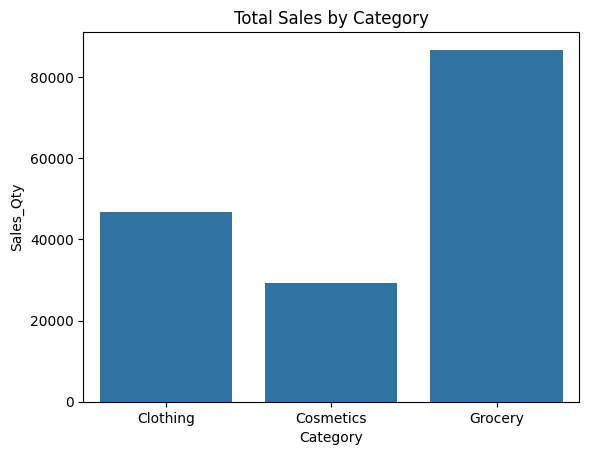

In [11]:
##Exploratory Data Analysis(EDA)
#TOTAL SALES BY CATEGORY
category_sales = df.groupby("Category")["Sales_Qty"].sum().reset_index()
sn.barplot(x="Category", y="Sales_Qty", data=category_sales)
plt.title("Total Sales by Category")
plt.show()

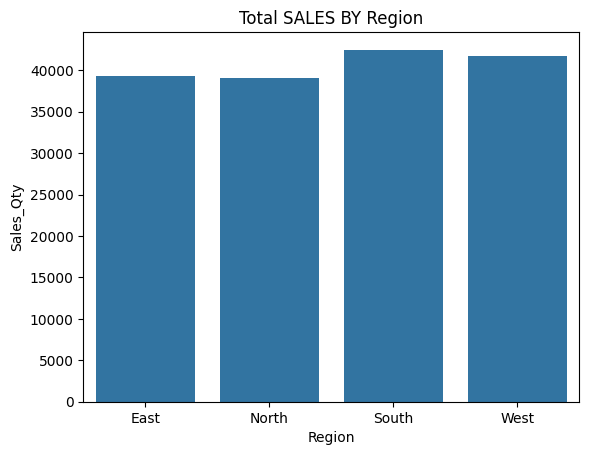

In [12]:
#Total sales by region
region_sales = df.groupby("Region")["Sales_Qty"].sum().reset_index()
sn.barplot(x = "Region", y = "Sales_Qty", data=region_sales)
plt.title("Total SALES BY Region")
plt.show()

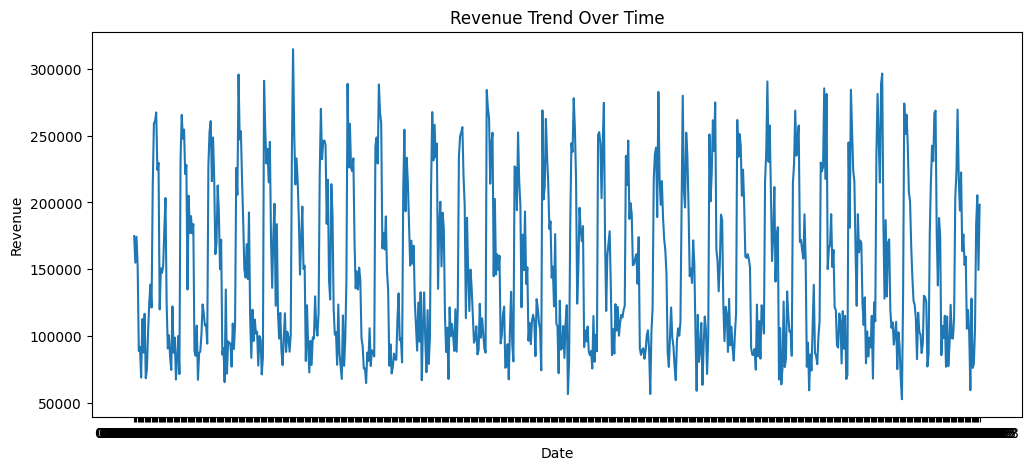

In [13]:
#Revenue Trend Over Time
revenue_trend = df.groupby("Date")["Revenue"].sum()
plt.figure(figsize=(12,5))
plt.plot(revenue_trend.index, revenue_trend.values)
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [14]:
##INVENTORY ANALYSIS
#Inventory Turnover Ratio per Category
turnover = df.groupby("Category").apply(lambda x: x["Sales_Qty"].sum()/ x["Stock_Level"].mean())
print("\nInventory Turnover by Category:",)
print(turnover)


Inventory Turnover by Category:
Category
Clothing     546.206725
Cosmetics    377.696120
Grocery      829.871878
dtype: float64


C:\Users\chait\AppData\Local\Temp\ipykernel_9180\2821179298.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  turnover = df.groupby("Category").apply(lambda x: x["Sales_Qty"].sum()/ x["Stock_Level"].mean())


In [16]:
# Top 5 Products by Revenue
top_products = df.groupby("Product_Name")["Revenue"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Revenue:")
print(top_products)

# Bottom 5 Products (slow movers)
slow_products = df.groupby("Product_Name")["Sales_Qty"].mean().sort_values().head(5)
print("\nSlow Moving Products (Lowest Avg Sales):")
print(slow_products)



Top 5 Products by Revenue:
Product_Name
Winter Jacket    47280000
Denim Jeans      16490400
Perfume          14643000
Cotton Shirt     11212000
Face Cream        6813100
Name: Revenue, dtype: int64

Slow Moving Products (Lowest Avg Sales):
Product_Name
Face Cream      13.332877
Perfume         13.372603
Lipstick        13.387671
Denim Jeans     18.824658
Cotton Shirt    19.198630
Name: Sales_Qty, dtype: float64


In [18]:
df.tail()

,Date,Product_ID,Product_Name,Category,Region,Sales_Qty,Stock_Level,Lead_Time,Unit_Price,Revenue,Season
6565,31-12-2023,P005,Denim Jeans,Clothing,South,24,65,5,1200,28800,Winter
6566,31-12-2023,P006,Winter Jacket,Clothing,East,53,141,8,2500,132500,Winter
6567,31-12-2023,P007,Lipstick,Cosmetics,West,7,65,13,500,3500,Winter
6568,31-12-2023,P008,Face Cream,Cosmetics,East,5,45,13,700,3500,Winter
6569,31-12-2023,P009,Perfume,Cosmetics,West,4,89,13,1500,6000,Winter


In [19]:
df.head()

,Date,Product_ID,Product_Name,Category,Region,Sales_Qty,Stock_Level,Lead_Time,Unit_Price,Revenue,Season
0,01-01-2022,P001,Basmati Rice,Grocery,East,48,138,2,60,2880,Winter
1,01-01-2022,P002,Wheat Flour,Grocery,East,30,83,4,40,1200,Winter
2,01-01-2022,P003,Cooking Oil,Grocery,West,49,142,2,150,7350,Winter
3,01-01-2022,P004,Cotton Shirt,Clothing,South,16,94,7,800,12800,Winter
4,01-01-2022,P005,Denim Jeans,Clothing,South,20,104,7,1200,24000,Winter
